In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Employee.csv')
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
def bar_chart(column):
  count = df[column].value_counts()

  index = count.index 
  values = count.values 

  fig = plt.figure(figsize = (8,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.show()

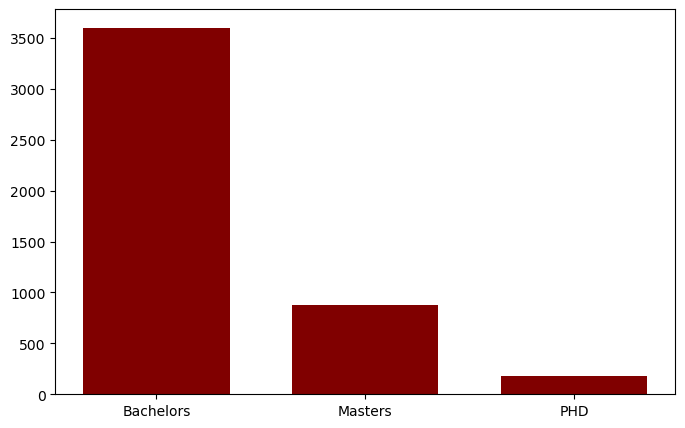

In [5]:
bar_chart('Education')

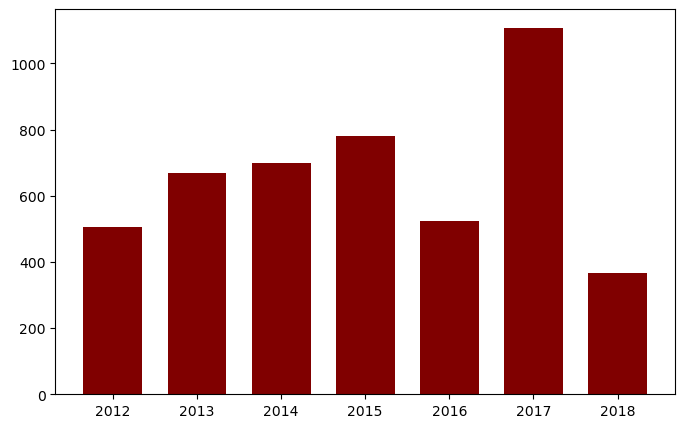

In [6]:
bar_chart('JoiningYear')

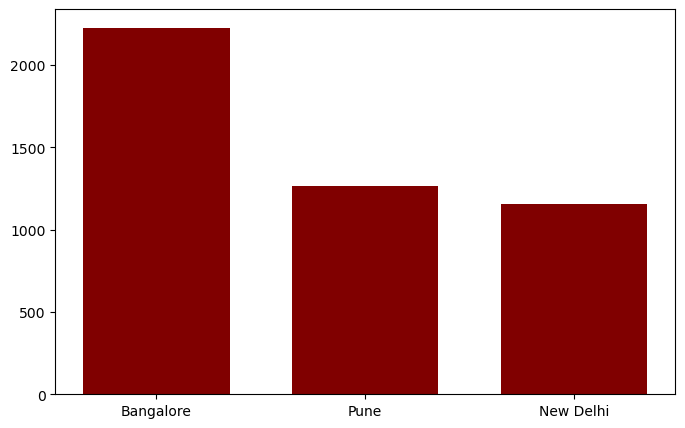

In [7]:
bar_chart('City')

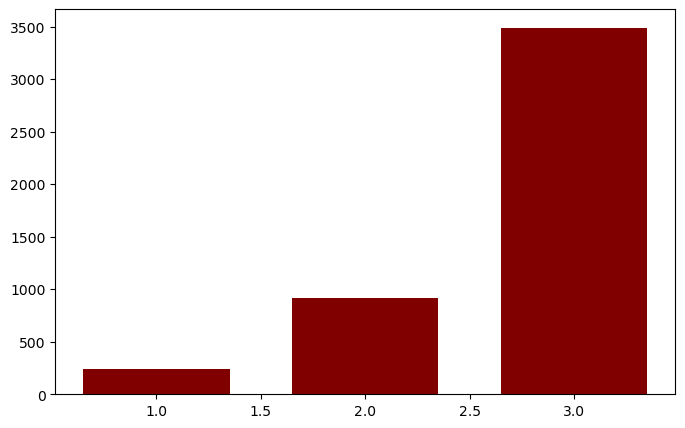

In [8]:
bar_chart('PaymentTier')

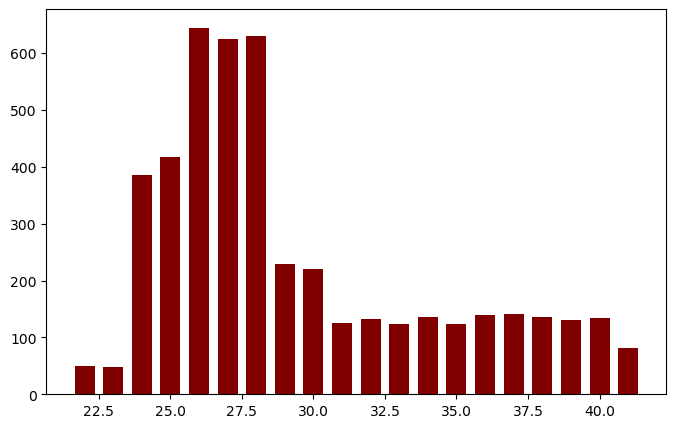

In [9]:
bar_chart('Age')

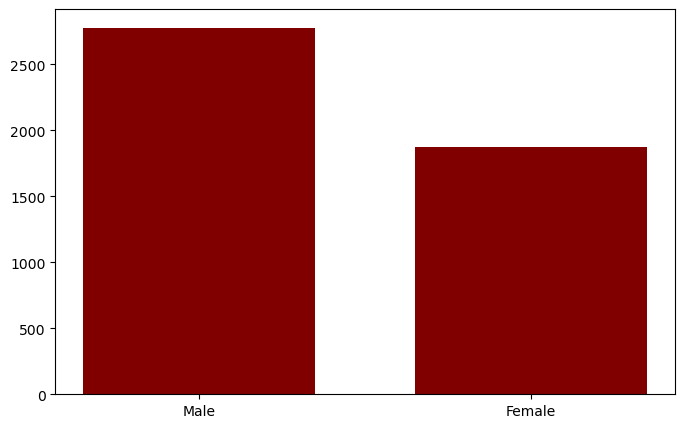

In [10]:
bar_chart('Gender')

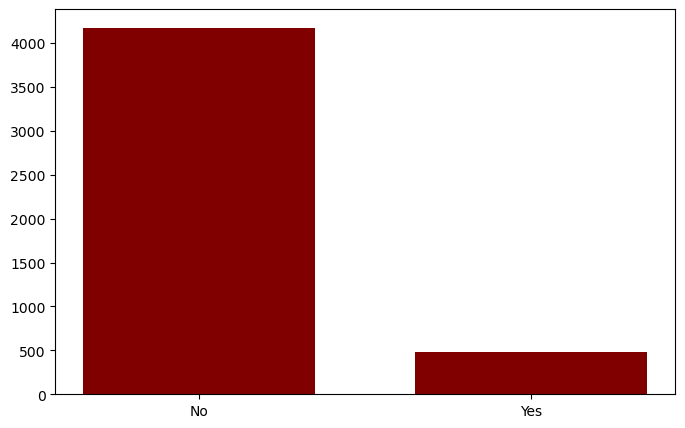

In [11]:
bar_chart('EverBenched')

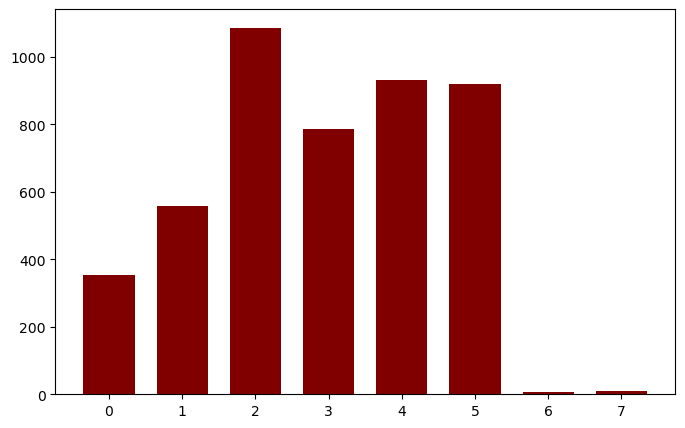

In [12]:
bar_chart('ExperienceInCurrentDomain')

In [13]:
def Target(column): 
    
  fig = plt.figure(figsize = (8,  5))
  sns.countplot(x=column, data = df, hue='LeaveOrNot', palette='bright')

  plt.show()


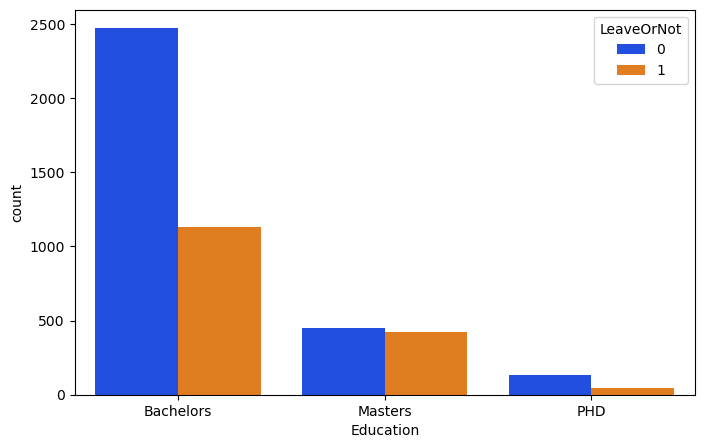

In [14]:
Target('Education')


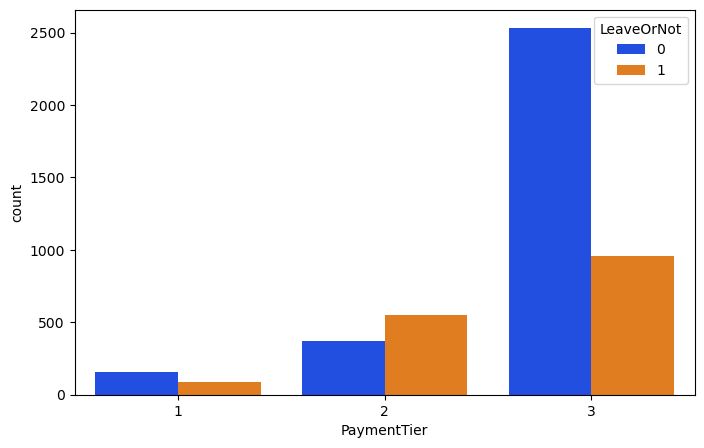

In [15]:
Target('PaymentTier')

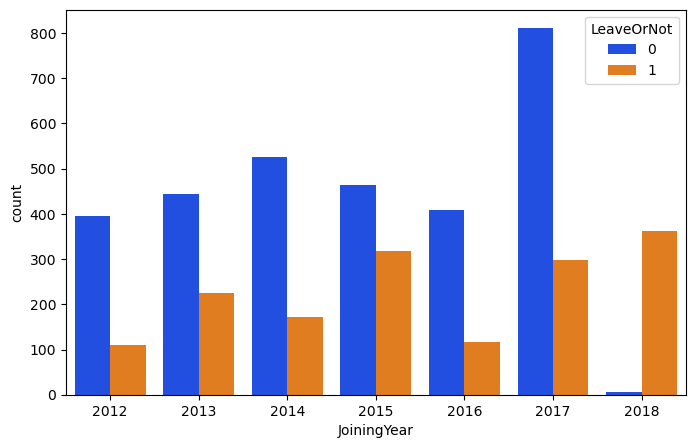

In [16]:
Target('JoiningYear')

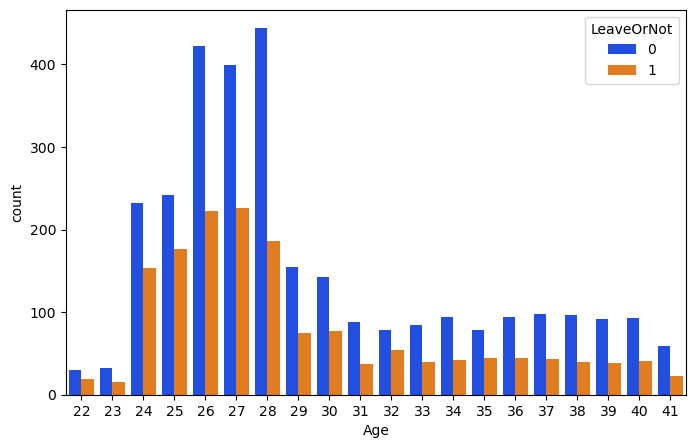

In [17]:
Target('Age')

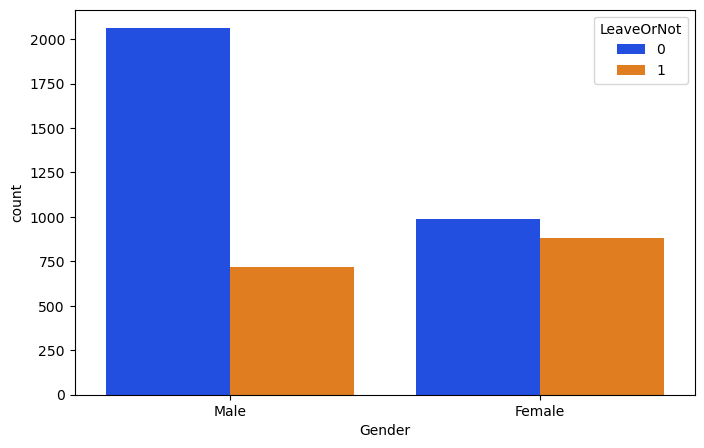

In [18]:
Target('Gender')

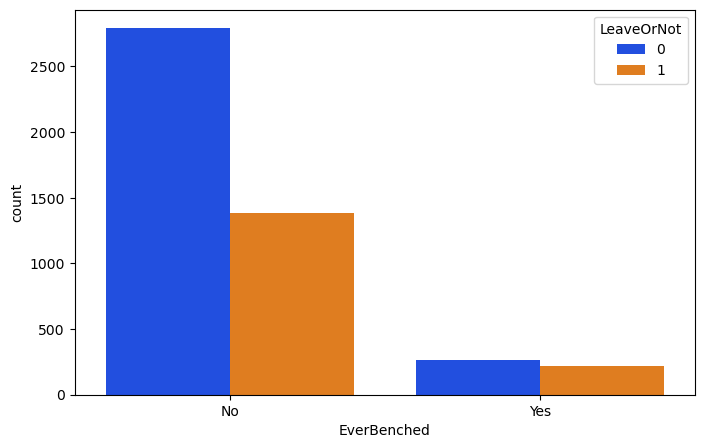

In [19]:
Target('EverBenched')

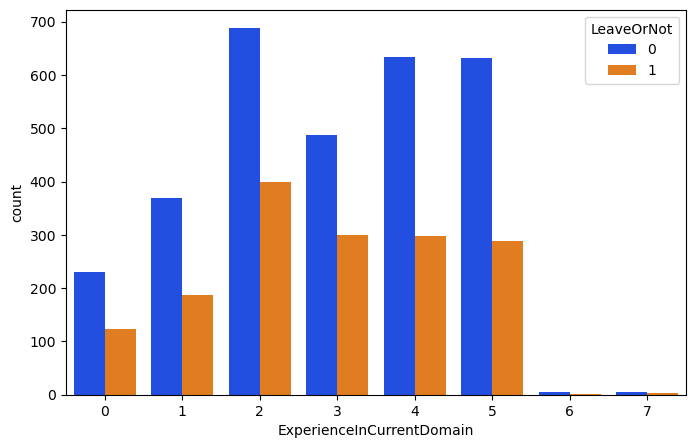

In [20]:
Target('ExperienceInCurrentDomain')

In [21]:
gender_mapping = {"Male" : 1, "Female" : 0}
education_mapping = {'Bachelors' : 0, 'Masters' : 1, 'PHD' : 2}
bench_mapping = {'No' : 0, 'Yes' : 1}


df['Gender'] = df['Gender'].map(gender_mapping)
df['Education'] = df['Education'].map(education_mapping)
df['EverBenched'] = df['EverBenched'].map(bench_mapping)

In [22]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,Bangalore,3,34,1,0,0,0
1,0,2013,Pune,1,28,0,0,3,1
2,0,2014,New Delhi,3,38,0,0,2,0
3,1,2016,Bangalore,3,27,1,0,5,1
4,1,2017,Pune,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,Bangalore,3,26,0,0,4,0
4649,1,2013,Pune,2,37,1,0,2,1
4650,1,2018,New Delhi,3,27,1,0,5,1
4651,0,2012,Bangalore,3,30,1,1,2,0


In [23]:
dummies = pd.get_dummies(df['City'])

In [24]:
df = pd.merge(df.reset_index(), dummies.reset_index())
df.head()

,index,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune
0,0,0,2017,Bangalore,3,34,1,0,0,0,1,0,0
1,1,0,2013,Pune,1,28,0,0,3,1,0,0,1
2,2,0,2014,New Delhi,3,38,0,0,2,0,0,1,0
3,3,1,2016,Bangalore,3,27,1,0,5,1,1,0,0
4,4,1,2017,Pune,3,24,1,1,2,1,0,0,1


In [25]:
df.drop(['index', 'City'], axis = 1, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4653 entries, 0 to 4652
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   PaymentTier                4653 non-null   int64
 3   Age                        4653 non-null   int64
 4   Gender                     4653 non-null   int64
 5   EverBenched                4653 non-null   int64
 6   ExperienceInCurrentDomain  4653 non-null   int64
 7   LeaveOrNot                 4653 non-null   int64
 8   Bangalore                  4653 non-null   uint8
 9   New Delhi                  4653 non-null   uint8
 10  Pune                       4653 non-null   uint8
dtypes: int64(8), uint8(3)
memory usage: 340.8 KB


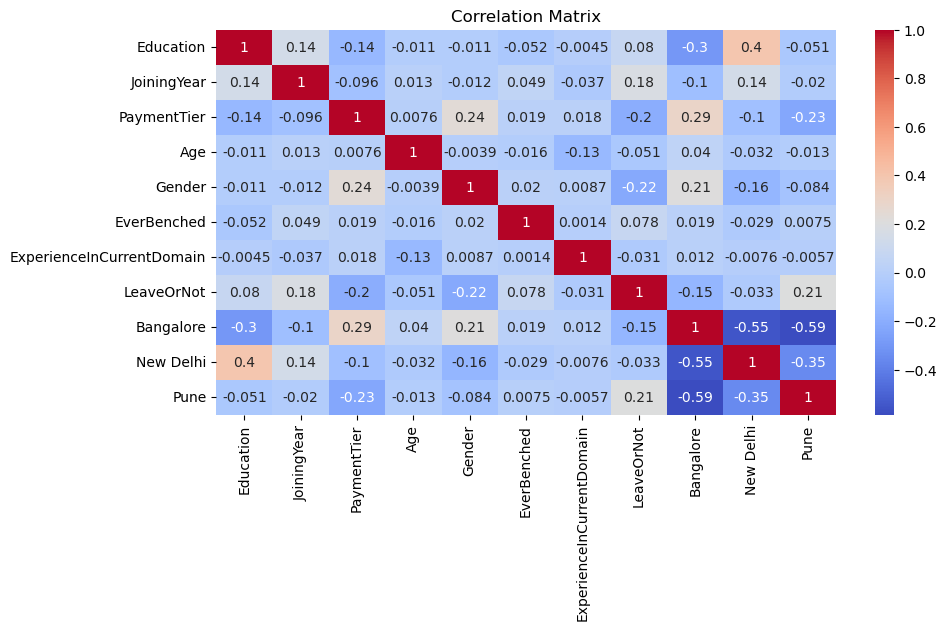

In [27]:
fig = plt.figure(figsize = (10,  5))
corelation = df.corr()
sns.heatmap(corelation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape

((3722, 10), (931, 10))

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8517722878625135


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.83      0.72      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



In [39]:
from sklearn.metrics import confusion_matrix

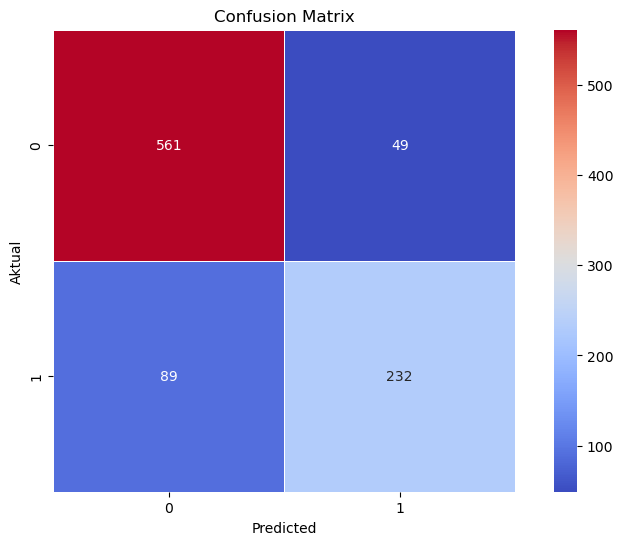

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')


plt.show()